<a href="https://colab.research.google.com/github/hsallrounder/Pattern-And-Anomaly-Detection-Lab/blob/main/cnn_flower_image_classification_data_augmentations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style='color:blue' align='center'>Data Augmentation To Address Overfitting In Flower Classification CNN</h2>

**In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc**

Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In below image, 4 new training samples are generated from original sample using different transformations

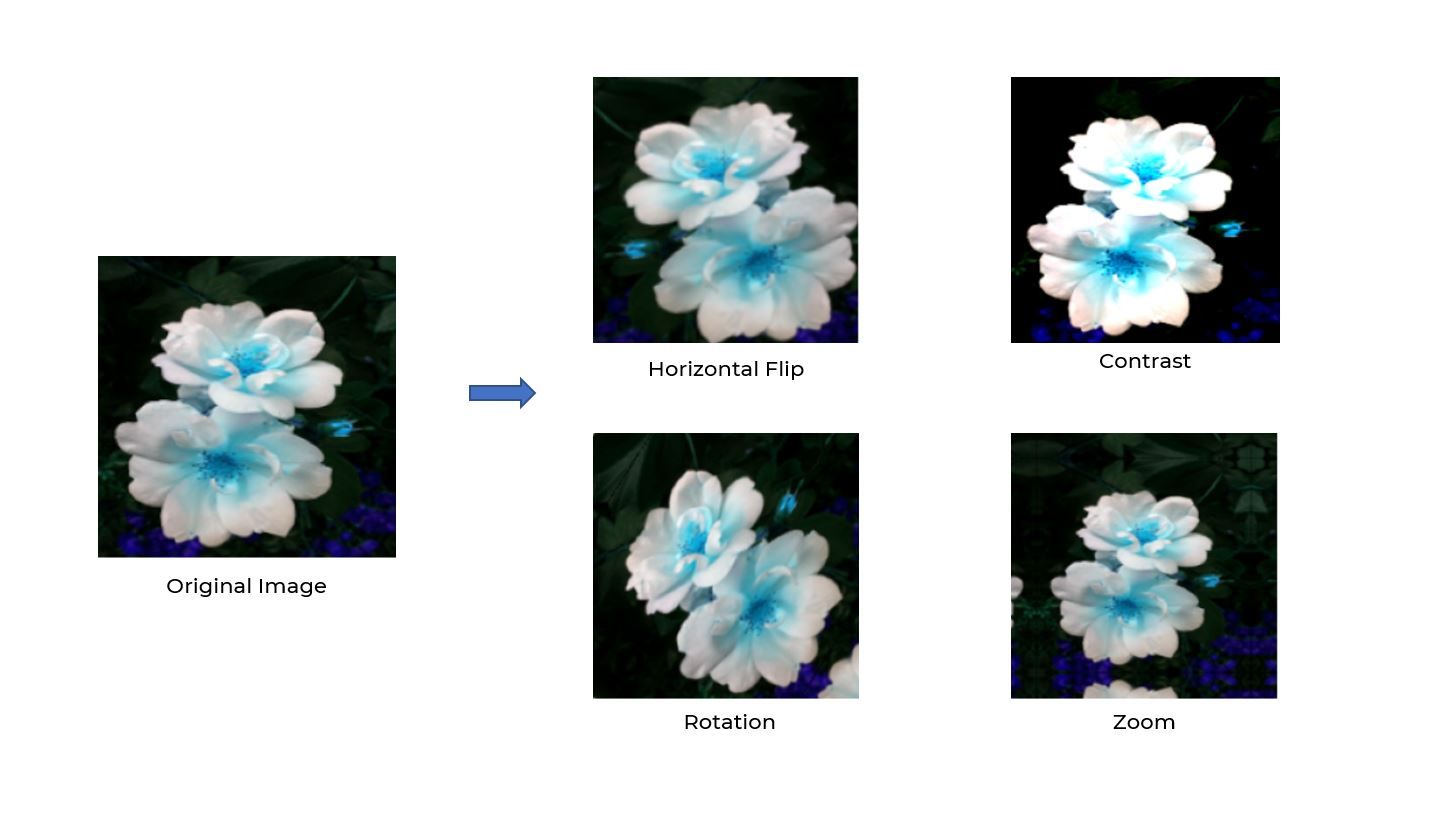

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

<h3 style='color:purple'>Load flowers dataset</h3>

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/9161647994_e39b65cb9c_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/16121105382_b96251e506_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/15029936576_8d6f96c72c_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/14866200659_6462c723cb_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/13491959645_2cd9df44d6_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/353897245_5453f35a8e.jpg'),
 PosixPath('datasets/flower_photos/roses/2535466143_5823e48b63.jpg'),
 PosixPath('datasets/flower_photos/roses/2980099495_cf272e90ca_m.jpg'),
 PosixPath('datasets/flower_photos/roses/685724528_6cd5cbe203.jpg'),
 PosixPath('datasets/flower_photos/roses/16258946661_f9739cdc0a.jpg')]

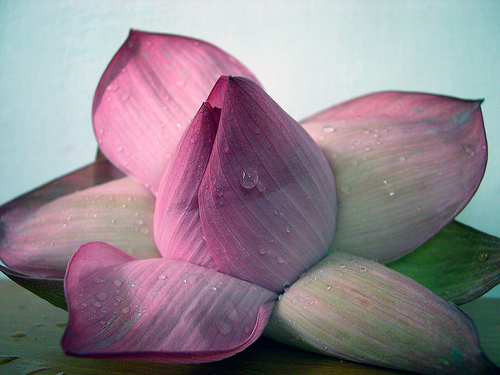

In [8]:
PIL.Image.open(str(roses[1]))

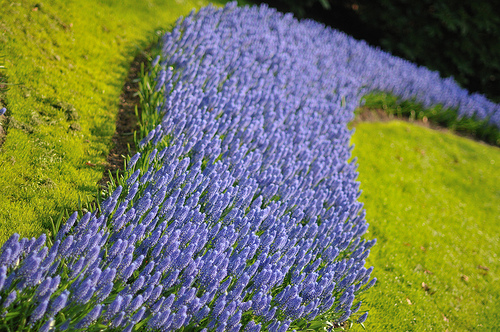

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/353897245_5453f35a8e.jpg'),
 PosixPath('datasets/flower_photos/roses/2535466143_5823e48b63.jpg'),
 PosixPath('datasets/flower_photos/roses/2980099495_cf272e90ca_m.jpg'),
 PosixPath('datasets/flower_photos/roses/685724528_6cd5cbe203.jpg'),
 PosixPath('datasets/flower_photos/roses/16258946661_f9739cdc0a.jpg')]

In [13]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/353897245_5453f35a8e.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(375, 500, 3)

In [16]:
img_height = 180
img_width = 180

In [17]:
cv2.resize(img,(img_height,img_width)).shape

(180, 180, 3)

In [18]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(img_height,img_width))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [19]:
X = np.array(X)
y = np.array(y)

<h3 style='color:purple'>Train test split</h3>

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<h3 style='color:purple'>Preprocessing: scale images</h3>

In [21]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<h3 style='color:purple'>Build convolutional neural network and train it</h3>

In [22]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=1)

86/86 [==============================] - 106s 1s/step - loss: 1.3565 - accuracy: 0.4281


In [23]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 11s 355ms/step - loss: 1.0958 - accuracy: 0.5523


[1.0958054065704346, 0.5522875785827637]

**Here we see that while train accuracy is very high (%), the test accuracy is significantly low (%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [24]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 11s 380ms/step


array([[-0.6561354 ,  0.25205192,  0.6573713 , -2.148949  , -0.6267634 ],
       [-0.91623867,  0.6008768 ,  0.7120117 ,  0.37730867, -0.54354054],
       [-2.3409395 , -1.2412444 ,  2.5460668 ,  2.847589  ,  0.22092482],
       ...,
       [-0.75314045, -0.7476183 ,  0.49501973,  2.809756  ,  0.12763813],
       [-1.7852869 , -0.15289828,  2.3866792 ,  1.0507208 , -0.7642129 ],
       [ 1.5638859 , -1.4331758 , -1.8662226 , -0.59164685,  1.6974719 ]],
      dtype=float32)

In [25]:
score = tf.nn.softmax(predictions[0])

In [26]:
np.argmax(score)

2

In [27]:
y_test[0]

1

<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

In [28]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

**Original Image**

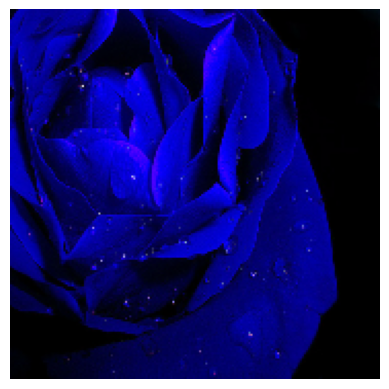

In [29]:
plt.axis('off')
plt.imshow(X[0])

**Newly generated training sample using data augmentation**

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

<h3 style='color:purple'>Train the model using data augmentation and a drop out layer</h3>

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=1)

In [ ]:
model.evaluate(X_test_scaled,y_test)

**You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to %**